# Diabetes data Analysis

# Introduction
The dataset includes multiple medical predictor variables along with a target variable that indicates whether a patient has diabetes.

Motivation:
Diabetes is a prevalent chronic condition impacting millions globally. Identifying the factors that lead to diabetes can aid in early detection and preventive measures.


#### Dataset: 
The dataset utilized in this project was sourced from Kaggle. The goal is to develop a model that can accurately predict whether a patient has diabetes based on specific diagnostic measurements provided in the dataset. The attributes of the dataset are as follows:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration measured two hours after an oral glucose tolerance test
* Blood Pressure: Diastolic blood pressure (mm Hg)
* Skin Thickness: Triceps skinfold thickness (mm)
* Insulin: 2-hour serum insulin level (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Diabetes Pedigree Function: A function that estimates the likelihood of diabetes based on family history
*Age: Age in years
* Outcome: Class variable indicating diabetes status (0: non-diabetic, 1: diabetic)

In [ ]:
# Hypotheses

Hypothesis 1: Higher glucose levels are associated with a higher risk of diabetes.
Hypothesis 2: Individuals with higher BMI are more likely to have diabetes.
Hypothesis 3: Age is a significant factor in the likelihood of having diabetes.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"D:\data_analytics\python\assignment\New folder\health care diabetes.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [7]:
data['Glucose'].value_counts().head(7)

Glucose
99     17
100    17
111    14
129    14
125    14
106    14
112    13
Name: count, dtype: int64

In [8]:
data.duplicated().sum()  #Checking for duplicates

0

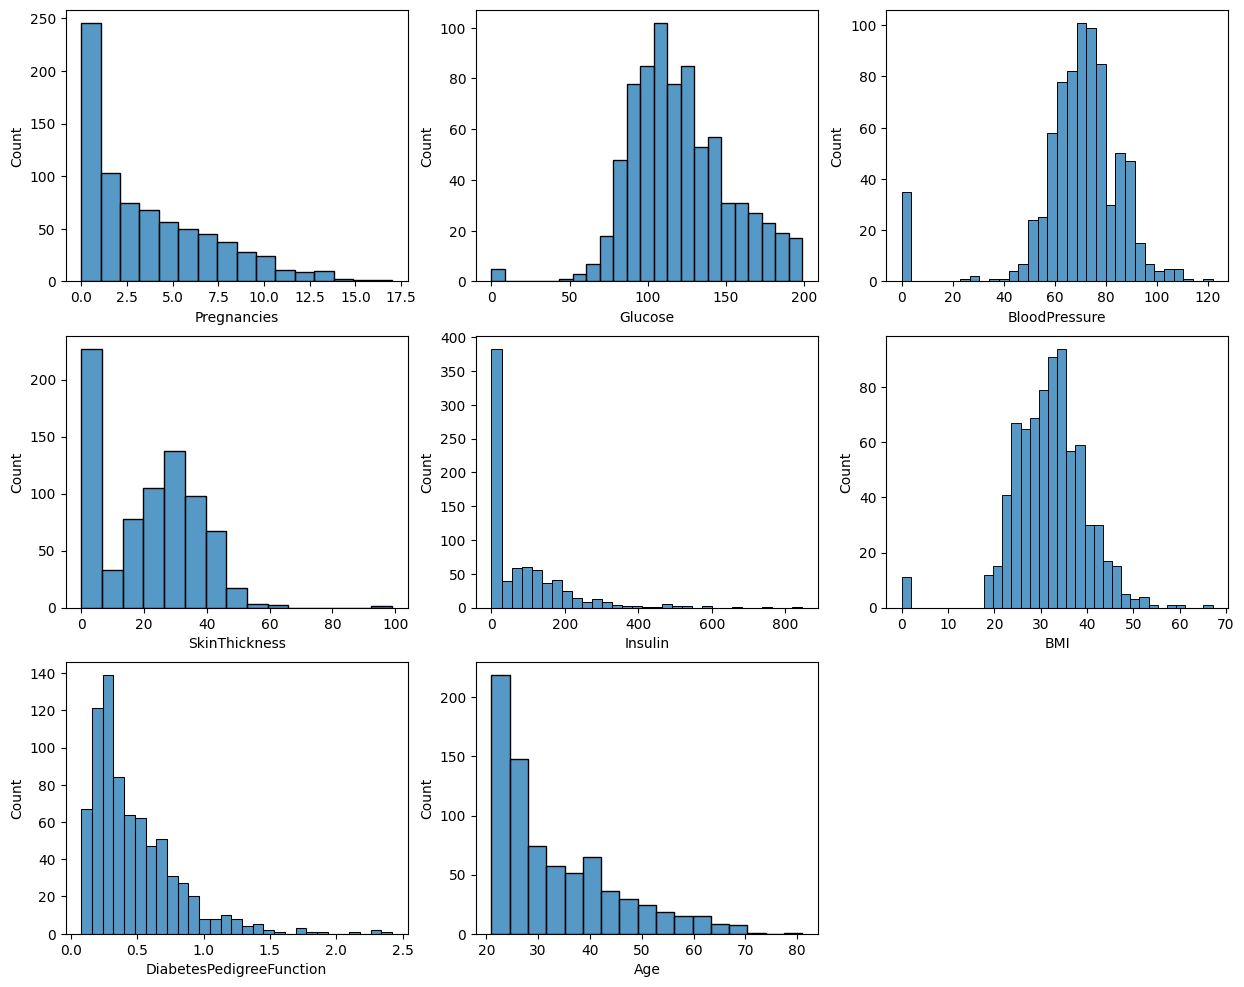

In [9]:
#Checking distribution of variables
plt.figure(figsize=(15,12))
for i in range(8):
    plt.subplot(3,3,i+1)
    sns.histplot(data.iloc[:,i]) 

#### __Conclusion:__
From the above density plot, we can see that the data is mostly skewed. Hence we shall replace the missing values with respective 'Median' values. The spikes seen at zero are missing values

In [10]:
data_copy = data.copy(deep=True)  #Taking Backup of our dataframe

In [11]:
#Updating 0 values to nan
cols = ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

data[data[cols] ==  0] = np.nan

In [12]:
data.isnull().sum() #Re-checking Missing Values

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
from sklearn.impute import SimpleImputer

In [15]:
# Treating null values using Simple Imputer with Median Strategy

impute = SimpleImputer(strategy='median')

df = pd.DataFrame(impute.fit_transform(data), columns = data.columns)

In [16]:
df.isnull().sum() #No missing values now

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
df.Outcome.value_counts(normalize=True)*100

Outcome
0.0    65.104167
1.0    34.895833
Name: proportion, dtype: float64

__Conclusion:__
Approximately 35% of patients in the dataset have Diabetes white 65% are Non Diabetic.

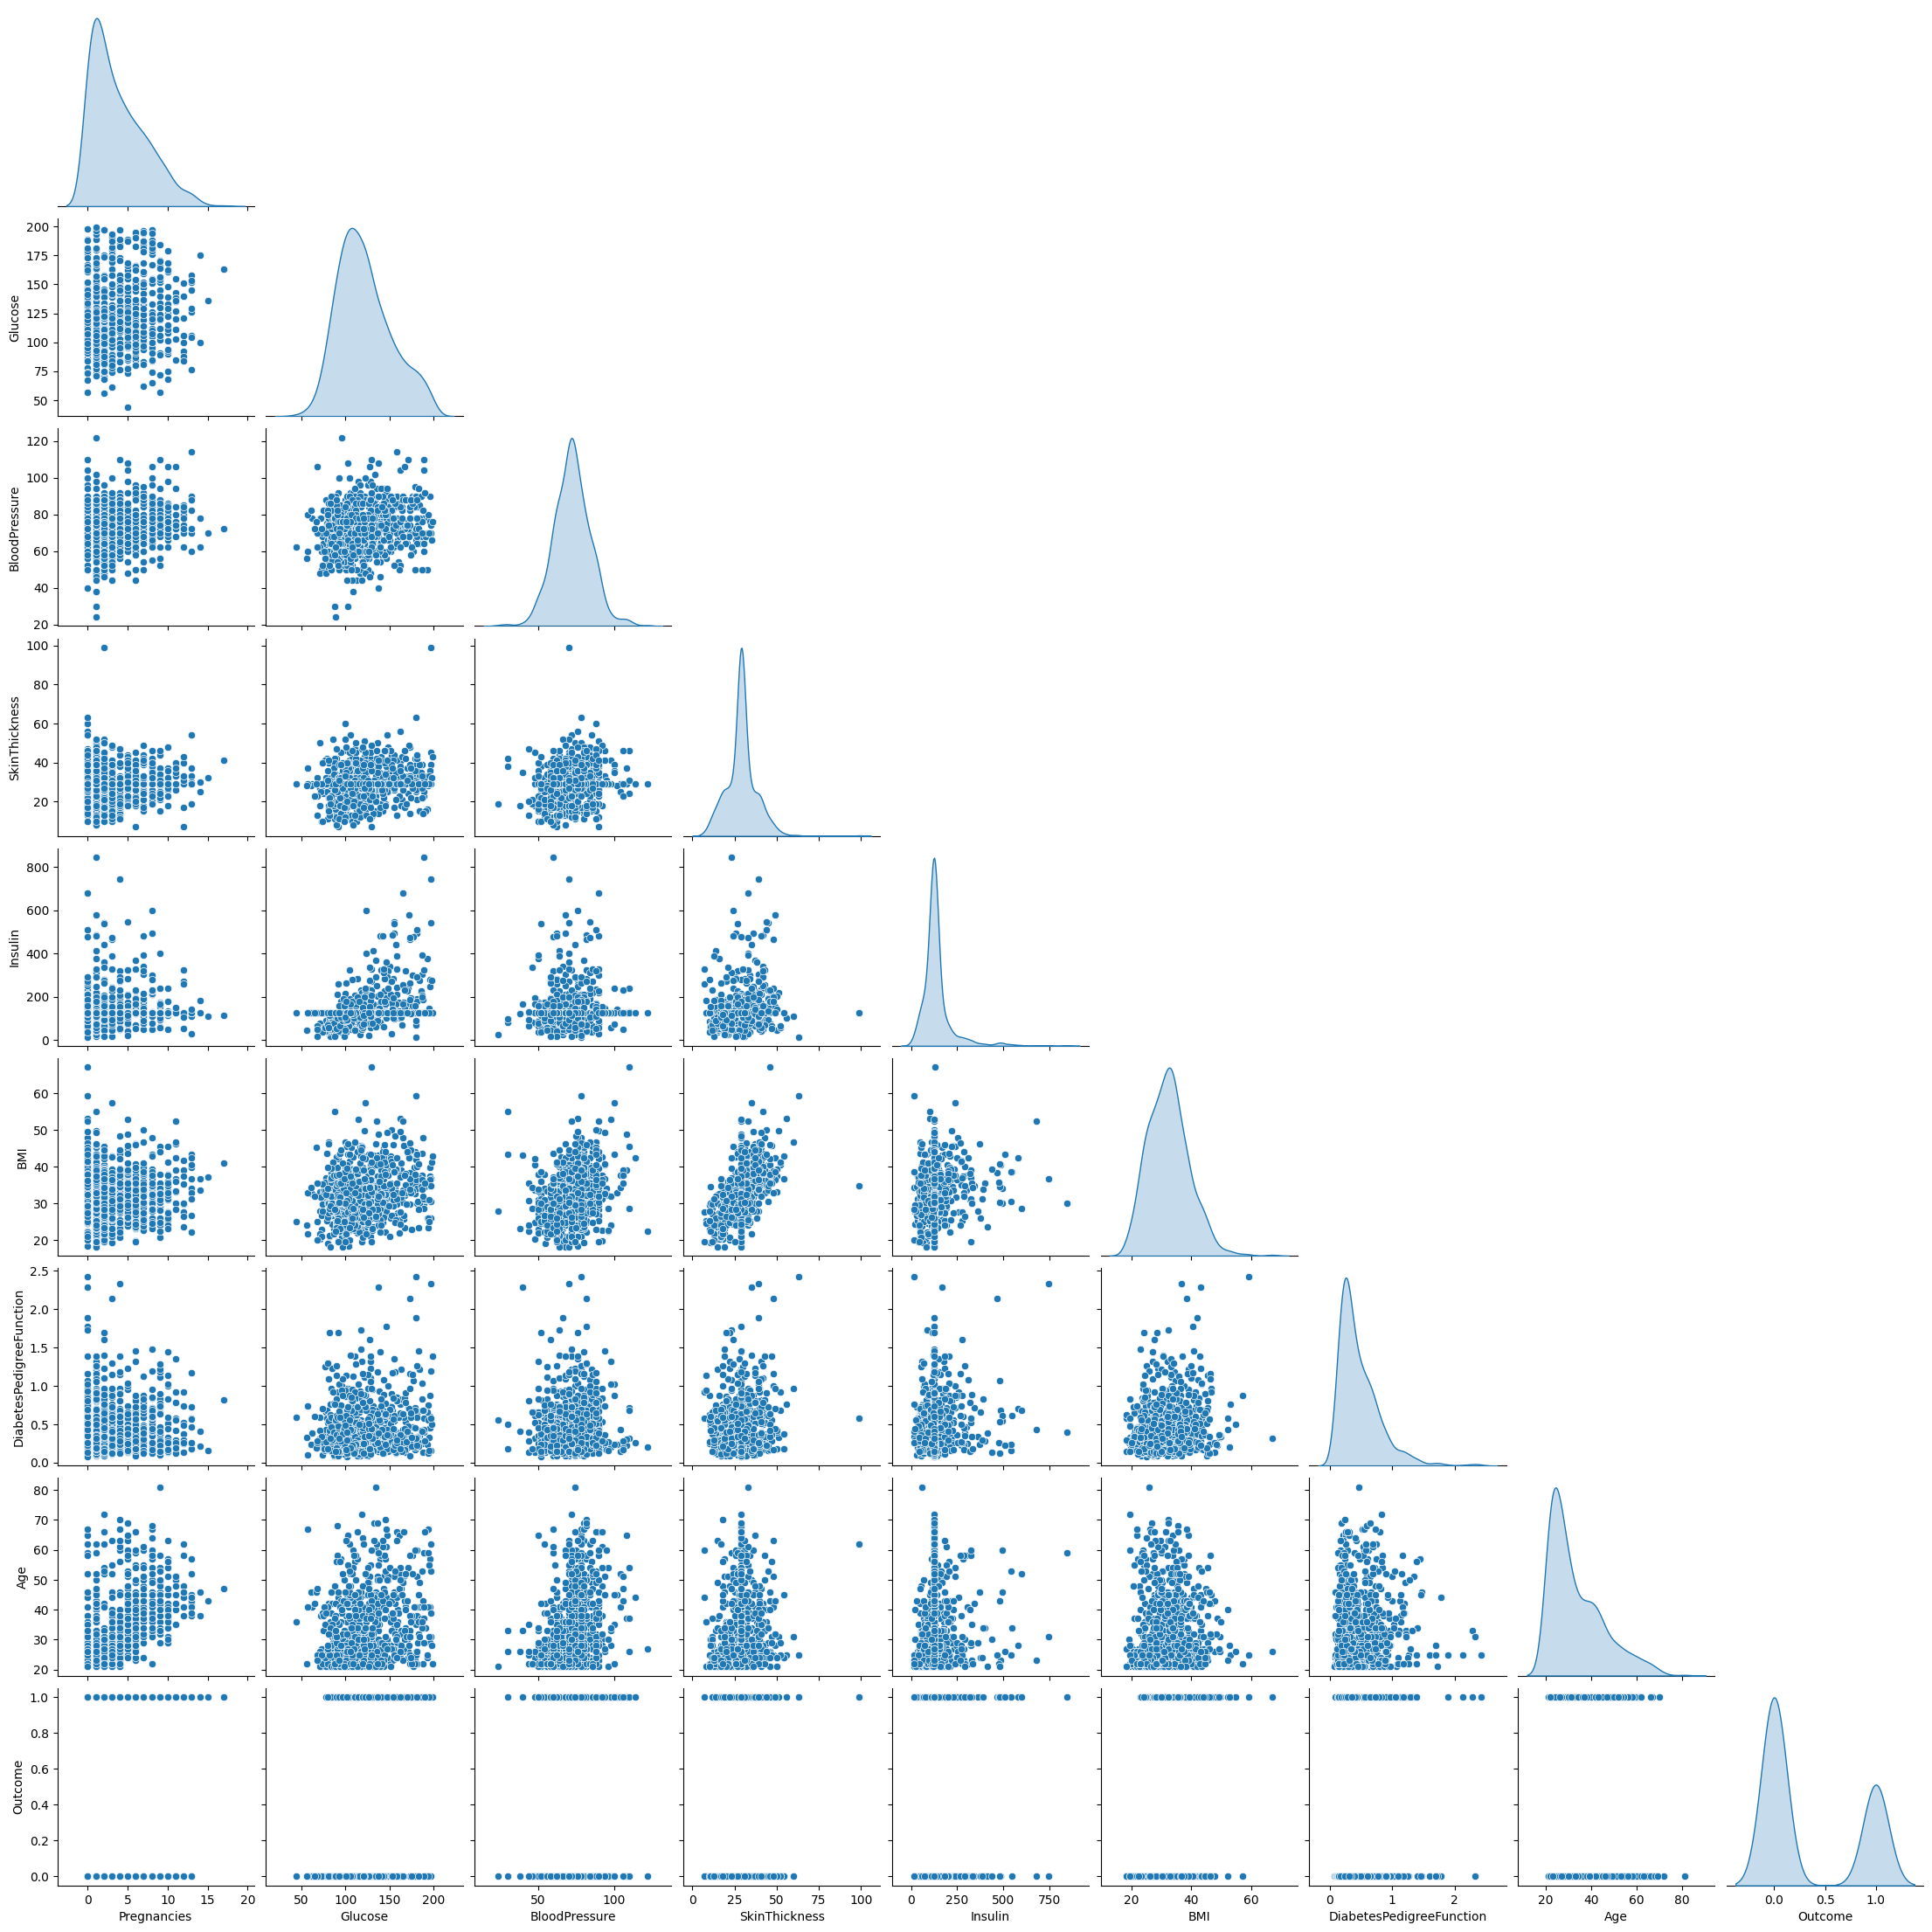

In [19]:
#scatter charts between the pair of variables 

sns.pairplot(data = df, kind = 'scatter',diag_kind= 'kde',corner = True)
plt.show()

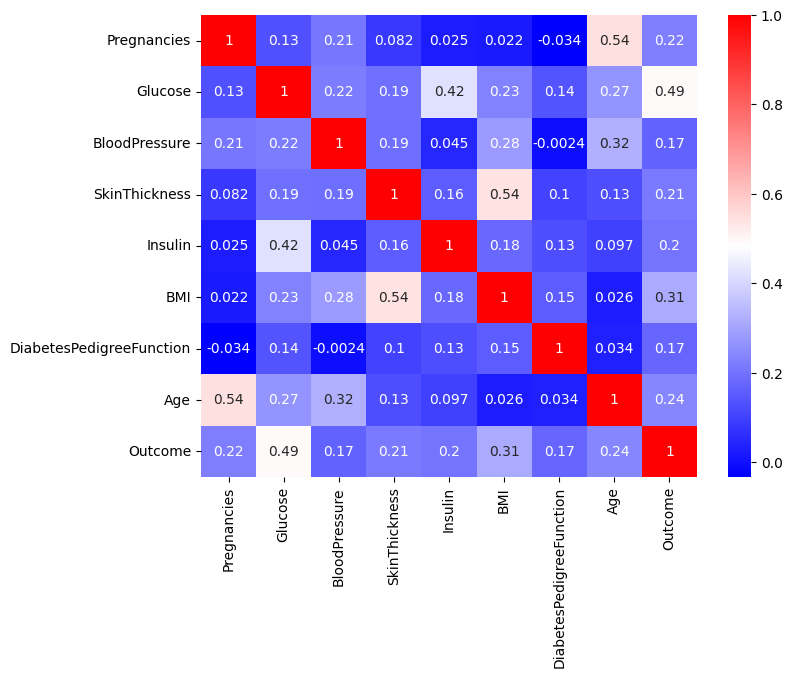

In [20]:
#Correlation analysis using Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), cmap='bwr',annot = True)
plt.show()

### __Conclusion:__
Based on the Pairplot and Heatmap, we can deduce the following insights:

* There is a positive correlation between "BMI" and "SkinThickness". A higher BMI, indicating greater weight relative to height, corresponds to increased SkinThickness.
* "Age" and "Pregnancies" also show a positive correlation, and "Age" has a slight correlation with "Blood Pressure".
* "Insulin" and "Glucose" levels are somewhat correlated.
* The target variable "Outcome" is correlated with "Glucose". Higher glucose levels in patients are associated with a greater likelihood of diabetes.
* The target variable "Outcome" is also slightly correlated with "BMI". Higher BMI values increase the probability of patients having diabetes.

## __Results:__
Upon performing the analysis on the diabetes dataset, we obtained the following results concerning our hypotheses:

Hypothesis 1: Higher glucose levels are associated with a higher risk of diabetes.
* __Result:__ The analysis confirmed a strong positive correlation between glucose levels and the likelihood of diabetes. Patients with higher glucose readings were significantly more likely to be diabetic.

Hypothesis 2: Individuals with higher BMI are more likely to have diabetes.
* __Result:__ There was a noticeable, albeit moderate, positive correlation between BMI and diabetes. Higher BMI values were linked to an increased probability of having diabetes, supporting the hypothesis.

Hypothesis 3: Age is a significant factor in the likelihood of having diabetes.
* __Result:__ Age showed some correlation with the likelihood of diabetes, particularly in older patients who had more pregnancies and higher blood pressure. However, the correlation was not as strong as that observed with glucose levels and BMI.


## __Discussion and Recommendations__

The analysis has provided several key insights and actionable recommendations:

__Glucose Levels and Diabetes:__

Insight: High glucose levels are a strong indicator of diabetes risk.
* __Recommendation:__ Regular monitoring of blood glucose levels should be a priority, especially for individuals at higher risk. Early detection and management of elevated glucose levels can help in preventing the onset of diabetes.
BMI and Diabetes:

Insight: Elevated BMI is associated with a higher likelihood of diabetes.
* __Recommendation:__ Maintaining a healthy weight through balanced diet and regular physical activity should be emphasized. Health professionals should focus on weight management programs for individuals with high BMI to reduce their diabetes risk.
Age and Diabetes:

Insight: Older age, combined with factors like higher number of pregnancies and increased blood pressure, slightly increases diabetes risk.
* __Recommendation:__ Preventive healthcare for older adults should include regular diabetes screening, especially for those with a history of multiple pregnancies and high blood pressure. Lifestyle modifications and medical interventions should be considered to manage these risk factors.
Comprehensive Health Monitoring:

Insight: Insulin and glucose levels, along with BMI, are crucial indicators of diabetes risk.
* __Recommendation:__ Implement a comprehensive health monitoring program that includes regular checks of glucose, insulin, and BMI. Educate patients about the importance of these metrics and how they relate to their overall health and diabetes risk.